PART 2 - Brach. test

survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
titanic_data = pd.read_csv('train.csv', index_col='PassengerId')
test = pd.read_csv('test.csv', index_col='PassengerId')
titanic_data.columns = pd.Series(titanic_data.columns).apply(lambda r: r.lower())
titanic_data.sex = titanic_data.sex.map({'female': 0, 'male': 1})
titanic_data.head(2)#[-2::]

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
test.columns = pd.Series(test.columns).apply(lambda r: r.lower())
test.sex = test.sex.map({'female': 0, 'male': 1})
test['survived']=[-1]*len(test)

cols=list(test)
cols.insert(0,cols.pop(cols.index('survived')))
test=test.loc[:,cols]

test.head(2)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
892,-1,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
893,-1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S


In [4]:
raw=pd.concat([titanic_data,test],) #join train and test datasets

In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
survived    1309 non-null int64
pclass      1309 non-null int64
name        1309 non-null object
sex         1309 non-null int64
age         1046 non-null float64
sibsp       1309 non-null int64
parch       1309 non-null int64
ticket      1309 non-null object
fare        1308 non-null float64
cabin       295 non-null object
embarked    1307 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 122.7+ KB


In [6]:
raw.age.describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: age, dtype: float64

In [7]:
age_table=raw.pivot_table(index=['sex','pclass'],columns = ['survived'],values='age',aggfunc='mean')
age_table # распределение возраста по классам отличается. Заполним потом пустые значения используя таблицу

survived           -1          0          1
sex pclass                                 
0   1       41.333333  25.666667  34.939024
    2       24.376552  36.000000  28.080882
    3       23.073400  23.818182  19.329787
1   1       40.520000  44.581967  36.248000
    2       30.940678  33.369048  16.022000
    3       24.525104  27.255814  22.274211

In [8]:
raw.pivot_table(index=['sex','pclass'],columns = ['survived'],values='age',aggfunc='count')
# there are more women survuved, rather than a men

survived    -1    0   1
sex pclass             
0   1       48    3  82
    2       29    6  68
    3       50   55  47
1   1       50   61  40
    2       59   84  15
    3       96  215  38

<BarContainer object of 65 artists>

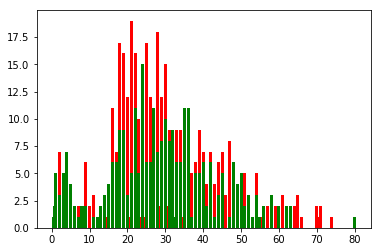

In [9]:
f1=raw[raw.survived==1].groupby(['age']).name.count()
f2=raw[raw.survived==0].groupby(['age']).name.count()
#pd.DataFrame(f1)

plt.bar(f2.index,f2,color='red')
plt.bar(f1.index,f1,color='green')


In [10]:
print( "Miss mean age: {}".format(raw[raw.name.str.contains('Miss')].age.mean()))
print( "Master mean age: {}".format(raw[raw.name.str.contains('Master')].age.mean()))
print( "Mrs mean age: {}".format(raw[raw.name.str.contains('Mrs.')].age.mean()))
print( "Mr mean age: {}".format(raw[raw.name.str.contains('Mr.')].age.mean()))
miss_age =raw[raw.name.str.contains('Miss')].age.mean()
master_age = raw[raw.name.str.contains('Master')].age.mean()

Miss mean age: 21.774238095238097
Master mean age: 5.482641509433963
Mrs mean age: 36.804597701149426
Mr mean age: 33.32208994708995


In [11]:
#titul column
raw.loc[raw.name.str.contains('Miss.'),'title']='miss'
raw.loc[raw.name.str.contains('Mr.'),'title']='mr'
raw.loc[raw.name.str.contains('Mrs.'),'title']='mrs'
raw.loc[raw.name.str.contains('Master'),'title']='master'
raw.loc[raw.name.str.contains('Dr.'),'title']='dr'
raw.loc[raw.name.str.contains('Don.'),'title']='don'
raw.loc[raw.name.str.contains('Master'),'title']='master'
raw.loc[raw.name.str.contains('Ms.'),'title']='ms'
raw.loc[raw.name.str.contains('Rev.'),'title']='rev'
raw.loc[raw.title.isnull(),'title']='other'

In [12]:
raw['deck']=raw.cabin.str[0]
raw.loc[raw.deck.isnull(),'deck']='na'

In [13]:
raw.loc[raw.fare==0,'nofare']=1
raw.nofare=raw.nofare.fillna(0)
#tickets with zero price

In [14]:
raw.age=raw.age.fillna(-1)
raw.cabin = raw.cabin.fillna('na')
raw.embarked= raw.embarked.fillna('S') # mostly
raw.fare = raw.fare.fillna(raw.fare.mean())

In [15]:
#fill the age for miss and master
na_index =raw[raw.age==-1].index 
for ind in na_index:
    if raw.loc[ind].title=='miss':
        raw.loc[ind,'age']=miss_age
    elif raw.loc[ind].title=='master':
        raw.loc[ind,'age']=master_age
    else:
        raw.loc[ind,'age']=age_table[raw.loc[ind].survived][raw.loc[ind].sex][raw.loc[ind].pclass]

In [16]:
#first letter of room number means the deck. It matters
tmp =raw.loc[:,['survived','cabin']]
tmp['cab']=tmp.cabin.str[0]
tmp.pivot_table(index=['cab'],columns='survived', values='cabin',aggfunc='count')

survived,-1,0,1
cab,,,
A,7.0,8.0,7.0
B,18.0,12.0,35.0
C,35.0,24.0,35.0
D,13.0,8.0,25.0
E,9.0,8.0,24.0
F,8.0,5.0,8.0
G,1.0,2.0,2.0
T,NaN,1.0,NaN
n,327.0,481.0,206.0


In [17]:
tmp['num']=tmp.cabin.str[-1:]
tmp.pivot_table(index='num',columns='survived',values='cabin',aggfunc='count')

survived,-1,0,1
num,,,
0,9.0,7.0,14.0
1,14.0,4.0,11.0
2,6.0,6.0,12.0
3,4.0,6.0,15.0
4,10.0,7.0,11.0
5,7.0,4.0,16.0
6,17.0,13.0,15.0
7,8.0,7.0,13.0
8,7.0,9.0,16.0


In [18]:
train_ind = list(raw[raw.survived!=-1].index)
test_ind = list(raw[raw.survived==-1].index)

In [19]:
num_col = ['pclass','sex', 'age','sibsp', 'parch','fare']#,'agesqr','sibsqr','parsqr','nofare','pclasssqr']
cat_col = ['embarked','title','deck']
y=raw[raw.survived!=-1]['survived']

In [20]:
raw.head(3)

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title,deck,nofare
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,na,S,mr,na,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,mrs,C,0.0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,na,S,miss,na,0.0


In [21]:
#convert categories
new_cat_cols=[]
for c in cat_col:
    for d in raw[c].unique():
        raw.loc[raw[c]==d,c+'_'+d]=1
        raw[c+'_'+d]=raw[c+'_'+d].fillna(0)
        new_cat_cols.append(c+'_'+d)
            
all_cols = num_col+new_cat_cols

In [22]:
#squared features
#sqrlist=['age','sibsp','parch','pclass']
#added_cols = []
#for a in sqrlist:
#    raw[a+'*'+a]=raw[a]**2
#    added_cols.append(a+'*'+a)
#all_cols = hstack((all_cols,added_cols))

In [23]:
# combination of features
added_cols = []
for a in all_cols:
    for b in all_cols:
        raw[a+'*'+b]=raw[a]*raw[b]
        added_cols.append(a+'*'+b)
all_cols = hstack((all_cols,added_cols))

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

C:\Users\Dima\Anaconda3\envs\main\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\Dima\Anaconda3\envs\main\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
C:\Users\Dima\Anaconda3\envs\main\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.u

In [145]:
#check the valuable features with lasso
LR=LogisticRegression(class_weight='balanced',fit_intercept=False, penalty='l1')
LR.fit(raw.loc[train_ind,all_cols],y)

co=pd.DataFrame(LR.coef_)
co.columns=all_cols
co=co.T
all_cols=co[abs(co[0])>0.02].index
co.sort_values(0)#

,0
pclass*title_miss,-0.763087
title_master*sibsp,-0.761873
sibsp*title_master,-0.697535
deck_na*sex,-0.680979
title_miss*pclass,-0.457268
embarked_C*sex,-0.305384
sex*deck_na,-0.286123
parch*parch,-0.222344
sex*embarked_C,-0.158688
sibsp*pclass,-0.108645


In [146]:
print(all_cols) 

Index(['embarked_C', 'title_miss', 'pclass*sibsp', 'pclass*parch',
       'pclass*title_miss', 'pclass*title_master', 'pclass*deck_E',
       'pclass*deck_D', 'sex*age', 'sex*embarked_C', 'sex*deck_na',
       'sex*deck_C', 'sex*deck_E', 'sibsp*pclass', 'sibsp*title_master',
       'sibsp*deck_B', 'parch*parch', 'parch*embarked_S', 'parch*embarked_C',
       'parch*title_mrs', 'parch*deck_B', 'embarked_S*parch', 'embarked_C*sex',
       'embarked_C*parch', 'embarked_C*embarked_C', 'embarked_Q*title_miss',
       'title_mr*deck_E', 'title_mrs*sibsp', 'title_mrs*parch',
       'title_miss*pclass', 'title_miss*embarked_Q', 'title_miss*title_miss',
       'title_master*pclass', 'title_master*sibsp', 'title_master*fare',
       'deck_na*sex', 'deck_na*sibsp', 'deck_E*sex', 'deck_G*fare',
       'deck_B*sibsp', 'deck_B*parch', 'deck_F*fare'],
      dtype='object')


In [147]:
import tensorflow as tf
from tensorflow import keras

In [148]:
#lear+test
X_all=raw.loc[train_ind,all_cols]
y_all=keras.utils.to_categorical(np.array(raw.survived[train_ind]))
X_train, X_test, y_train, y_test = train_test_split(
                                X_all, y_all, test_size=0.2, random_state=42)
scaler = StandardScaler() 
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [152]:
#for submission only
X_all=raw.loc[train_ind,all_cols]
y_all=keras.utils.to_categorical(np.array(raw.survived[train_ind]))

scaler = StandardScaler() 
scaler.fit(X_all)
X_train_scaled=scaler.transform(X_all)
y_train=y_all

In [153]:
model = keras.Sequential()
model.add(keras.layers.Dense(train_data.shape[1],activation='relu'))
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dense(2048,activation='relu'))
model.add(keras.layers.Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])
          

In [154]:
model.fit(X_train_scaled,y_train,
             nb_epoch=100,
             verbose=1,
             validation_split=0.1)

Train on 801 samples, validate on 90 samples
Epoch 1/100
801/801 [==============================] - 1s 2ms/step - loss: 0.6360 - acc: 0.7541 - val_loss: 0.5892 - val_acc: 0.8000
Epoch 2/100
801/801 [==============================] - 0s 554us/step - loss: 0.5557 - acc: 0.8090 - val_loss: 0.5286 - val_acc: 0.8222
Epoch 3/100
801/801 [==============================] - 0s 555us/step - loss: 0.5107 - acc: 0.8152 - val_loss: 0.4914 - val_acc: 0.8444
Epoch 4/100
801/801 [==============================] - 0s 559us/step - loss: 0.4805 - acc: 0.8240 - val_loss: 0.4601 - val_acc: 0.8556
Epoch 5/100
801/801 [==============================] - 0s 558us/step - loss: 0.4617 - acc: 0.8252 - val_loss: 0.4442 - val_acc: 0.8778
Epoch 6/100
801/801 [==============================] - 0s 565us/step - loss: 0.4522 - acc: 0.8265 - val_loss: 0.4340 - val_acc: 0.8778
Epoch 7/100
801/801 [==============================] - 0s 564us/step - loss: 0.4466 - acc: 0.8290 - val_loss: 0.4412 - val_acc: 0.8444
Epoch 8/100


801/801 [==============================] - 0s 556us/step - loss: 0.3813 - acc: 0.8427 - val_loss: 0.3377 - val_acc: 0.8778
Epoch 61/100
801/801 [==============================] - 0s 555us/step - loss: 0.3838 - acc: 0.8427 - val_loss: 0.3283 - val_acc: 0.8556
Epoch 62/100
801/801 [==============================] - 0s 559us/step - loss: 0.3819 - acc: 0.8477 - val_loss: 0.3282 - val_acc: 0.8556
Epoch 63/100
801/801 [==============================] - 0s 560us/step - loss: 0.3809 - acc: 0.8427 - val_loss: 0.3239 - val_acc: 0.8556
Epoch 64/100
801/801 [==============================] - 0s 560us/step - loss: 0.3791 - acc: 0.8464 - val_loss: 0.3223 - val_acc: 0.8556
Epoch 65/100
801/801 [==============================] - 0s 556us/step - loss: 0.3792 - acc: 0.8402 - val_loss: 0.3236 - val_acc: 0.8556
Epoch 66/100
801/801 [==============================] - 0s 560us/step - loss: 0.3785 - acc: 0.8464 - val_loss: 0.3222 - val_acc: 0.8556
Epoch 67/100
801/801 [==============================] - 0s 56

In [151]:
score=model.evaluate(X_test_scaled,y_test)
score

179/179 [==============================] - 0s 123us/step


[0.4910419390188249, 0.8100558689186693]

In [155]:
X_kaggle=np.array(raw.loc[test_ind,all_cols])
X_kaggle = scaler.transform(X_kaggle)
prediction=model.predict(X_kaggle)
pr=pd.DataFrame(prediction.argmax(axis=1))
pr.index= test.index
pr.columns=['survived']
pr.to_csv("NN_MLP.csv")

#запустим классификаторы. Используем кросс-валидацию и подбор параметров по сетке. Ну и выполним масштабирование признаков

cv=StratifiedKFold(y,n_folds=3,shuffle=True,random_state=1)
LR = LogisticRegression(class_weight='balanced',fit_intercept=False, penalty='l2')
RF = RandomForestClassifier(n_estimators=70,max_depth=15)
#XGB = XGBClassifier()

train_data = raw.loc[train_ind,all_cols]
test_data = raw.loc[test_ind,all_cols]

scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data,y)
test_data_scaled = scaler.transform(test_data)

train_data = train_data_scaled
test_data=test_data_scaled

estimator=LR
scores = cross_val_score(estimator,train_data,y,cv=cv,n_jobs=-1)
LR_best =LR
LR.fit(train_data,y)
print ('LR: {} / {}'.format(scores.mean(),scores.std()))

estimator=RF

scores = cross_val_score(estimator,train_data,y,cv=cv,n_jobs=-1)
print ('simple RF: {} / {}'.format(scores.mean(),scores.std()))
RF=RandomForestClassifier()
RF_params=[{
    "n_estimators":[20,30,50,70],
    "min_samples_split":[4,8,10],
    "max_depth":[10,15,20],
    "min_samples_leaf":[2,3,4]
}]
RF_grid=GridSearchCV(RF,RF_params,cv=3,refit=True,verbose=1,n_jobs=-1)
RF_grid.fit(train_data,y)
RF_best = RF_grid.best_estimator_
print ('RF: {}, params:{} '.format(RF_grid.best_score_,RF_grid.best_params_))


#estimator=XGB
#scores = cross_val_score(estimator,train_data,y,cv=cv,n_jobs=-1)
#print ('Simple XGB: {} / {}'.format(scores.mean(),scores.std()))

#XGB_params = [{
#    "n_estimators":[150,200,250],
#    "max_depth":[2,3,4,5],
#    "learning_rate":[0.01,0.02,0.05]
#}]
#XGB_grid = GridSearchCV(XGB,XGB_params,cv=3,refit=True, verbose=1,n_jobs=1)
#XGB_grid.fit(train_data,y)
#XGB_best = XGB_grid.best_estimator_
#print ('XGB: {}, params:{} '.format(XGB_grid.best_score_,XGB_grid.best_params_))

print ('-'*15+ 'done'+'-'*15)

test_data=test_data_scaled

answers = pd.DataFrame(LR_best.predict(test_data))
answers.columns=['survived']
answers.index = test.index
#answers.head(4)
answers.to_csv('answer_LR.csv')

answers = pd.DataFrame(RF_best.predict(test_data))
answers.columns=['survived']
answers.index = test.index
answers.to_csv('answer_rf.csv')

answers = pd.DataFrame(XGB_best.predict(test_data))
answers.columns=['survived']
answers.index = test.index
answers.to_csv('answer_XGB.csv')